In [1]:
## Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df=pd.read_csv("Travel.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:
df.shape

(4888, 20)

### Data Cleaning

#### Handling missing values
1. Handling Missing values
2. Handling Dulicates
3. Check data type
4. Understand the dataset

In [4]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

##### Check all the categories

In [5]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [6]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [7]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [8]:
df['Gender']=df['Gender'].replace('Fe Male','Female')
df['MaritalStatus']=df['MaritalStatus'].replace('Single','Unmarried')

In [9]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [10]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [11]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [12]:
## Check the missing values
## There are the features with non-value

features_with_na = [features for features in df.columns if df[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '%missing values')

Age 4.62357 %missing values
TypeofContact 0.51146 %missing values
DurationOfPitch 5.13502 %missing values
NumberOfFollowups 0.92062 %missing values
PreferredPropertyStar 0.53191 %missing values
NumberOfTrips 2.86416 %missing values
NumberOfChildrenVisiting 1.35025 %missing values
MonthlyIncome 4.76678 %missing values


In [13]:
# Statistics on numerical columns (Null cols)
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


#### Imputing Null values
1. Impute Medium value for Age column
2. Impute Mode for Type of Contract
3. Impute Median for Duration of Pitch
4. Impute Mode for NumberofFollowup as it is Discrete feature
5. Impute Mode for PreferredPropertyStar
6. Impute Median for NumberofTrips
7. Impute Mode for NumberOfChildrenVisiting
8. Impute Median for MonthlyIncome

In [14]:
# Age
df.Age.fillna(df.Age.median(),inplace=True)

# Type of Contract
df.TypeofContact.fillna(df.TypeofContact.mode()[0],inplace=True)

# Duration of Pitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(),inplace=True)

# Number of Followups
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0],inplace=True)

# Preferred Property Star
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0],inplace=True)

# Number of Trips
df.NumberOfTrips.fillna(df.NumberOfTrips.median(),inplace=True)

# Number of Children visited
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0],inplace=True)

# Monthly Income
df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace=True)

In [15]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [16]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [17]:
df.drop('CustomerID',inplace=True,axis=1)

In [18]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [19]:
df['TotalVisiting']=df['NumberOfPersonVisiting']+ df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting','NumberOfChildrenVisiting'],inplace=True,axis=1)

In [20]:
## Get all numeric features
num_features = [feature for features in df.columns if df[feature].dtype !='O']
print("Number of numerical features:",len(num_features))

Number of numerical features: 18


In [21]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [22]:
## Categorical feature
ca_features=[feature for feature in df.columns if df[feature].dtype=='O']
print("Num of categorical features:",len(ca_features))

Num of categorical features: 6


In [23]:
## Discrete Features
discrete_features=[feature for feature in num_features if len(df[feature].unique())<25]
print("Number of discrete features:",len(discrete_features))

Number of discrete features: 0


In [24]:
## Continous Features
continuous_features = [feature for feature in num_features if feature not in discrete_features]
print("Number of continuous features:",len(continuous_features))

Number of continuous features: 18


In [25]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


### Train Test Split and Model training


In [26]:
from sklearn.model_selection import train_test_split
X=df.drop(['ProdTaken'],axis=1)
y=df['ProdTaken']

In [27]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [28]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: ProdTaken, dtype: int64

In [29]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape , X_test.shape

((3910, 17), (978, 17))

In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4888 non-null   float64
 1   TypeofContact           4888 non-null   object 
 2   CityTier                4888 non-null   int64  
 3   DurationOfPitch         4888 non-null   float64
 4   Occupation              4888 non-null   object 
 5   Gender                  4888 non-null   object 
 6   NumberOfFollowups       4888 non-null   float64
 7   ProductPitched          4888 non-null   object 
 8   PreferredPropertyStar   4888 non-null   float64
 9   MaritalStatus           4888 non-null   object 
 10  NumberOfTrips           4888 non-null   float64
 11  Passport                4888 non-null   int64  
 12  PitchSatisfactionScore  4888 non-null   int64  
 13  OwnCar                  4888 non-null   int64  
 14  Designation             4888 non-null   

In [32]:
# Create Column Transformer with 3 types of transformers
cat_features =X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ]
)

In [33]:
preprocessor

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('OneHotEncoder', ...), ('StandardScaler', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``f

In [34]:
## Applying Transformation in training (fit_transform)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [35]:
X_train

array([[ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.38224537, -0.77415132],
       [ 1.        ,  0.        ,  1.        , ...,  0.78296635,
        -0.4597992 ,  0.64361526],
       [ 1.        ,  1.        ,  0.        , ...,  0.78296635,
        -0.24519557, -0.06526803],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.36057591,  0.64361526],
       [ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.25279888,  0.64361526],
       [ 0.        ,  0.        ,  1.        , ..., -1.2771941 ,
        -1.08251091, -1.48303461]], shape=(3910, 26))

### Random Forest Classifier Training

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score

In [45]:
models={
    "RandomForestClassifier":RandomForestClassifier(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "LogisticRegression":LogisticRegression(),
    "AdaboostClassifier":AdaBoostClassifier()

}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)  # Train Model

    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred)
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_rocaue_score = roc_auc_score(y_train,y_train_pred)
    
    # Test Perdormance
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_f1=f1_score(y_test,y_test_pred)
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall = recall_score(y_test,y_test_pred)
    model_test_rocaue_score = roc_auc_score(y_test,y_test_pred)

    print(list(models.keys())[i])

    print('Model performance on Training Set')
    print("---Accuracy :{:4f}",format(model_train_accuracy))
    print("--F1 Score :{:4f}",format(model_train_f1))

    print("--Precision:{:4f}",format(model_train_precision))
    print("--Recall :{:4f}",format(model_train_recall))
    print("--Roc Aue Score :{:4f}",format(model_train_rocaue_score))


    print('\nModel performance on Test Set')
    print(f"Accuracy : {model_test_accuracy:.4f}")
    print(f"F1 Score : {model_test_f1:.4f}")
    print(f"Precision: {model_test_precision:.4f}")
    print(f"Recall   : {model_test_recall:.4f}")
    print(f"ROC AUC  : {model_test_rocaue_score:.4f}")

    print('='*40)
    print('\n')


RandomForestClassifier
Model performance on Training Set
---Accuracy :{:4f} 1.0
--F1 Score :{:4f} 1.0
--Precision:{:4f} 1.0
--Recall :{:4f} 1.0
--Roc Aue Score :{:4f} 1.0

Model performance on Test Set
Accuracy : 0.9346
F1 Score : 0.8037
Precision: 0.9704
Recall   : 0.6859
ROC AUC  : 0.8404


DecisionTreeClassifier
Model performance on Training Set
---Accuracy :{:4f} 1.0
--F1 Score :{:4f} 1.0
--Precision:{:4f} 1.0
--Recall :{:4f} 1.0
--Roc Aue Score :{:4f} 1.0

Model performance on Test Set
Accuracy : 0.9223
F1 Score : 0.7957
Precision: 0.8177
Recall   : 0.7749
ROC AUC  : 0.8665


LogisticRegression
Model performance on Training Set
---Accuracy :{:4f} 0.8460358056265984
--F1 Score :{:4f} 0.42337164750957856
--Precision:{:4f} 0.7015873015873015
--Recall :{:4f} 0.30315500685871055
--Roc Aue Score :{:4f} 0.6368022755136056

Model performance on Test Set
Accuracy : 0.8364
F1 Score : 0.4118
Precision: 0.6914
Recall   : 0.2932
ROC AUC  : 0.6307


AdaboostClassifier
Model performance on Train

#### Hyper parameter Tuning


In [51]:
## Hyperparameter Training
rf_params = {"max_depth":[5,8,15,None,10],
             "max_features":[5,7,"auto",8],
             "min_samples_split":[2,8,15,20],
             "n_estimators":[100,200,500,1000]}

ada_params = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
    'estimator': [
        DecisionTreeClassifier(max_depth=1),
        DecisionTreeClassifier(max_depth=2),
        DecisionTreeClassifier(max_depth=3)
    ]
}

In [52]:
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [54]:
ada_params

{'n_estimators': [50, 100, 200, 300],
 'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
 'estimator': [DecisionTreeClassifier(max_depth=1),
  DecisionTreeClassifier(max_depth=2),
  DecisionTreeClassifier(max_depth=3)]}

In [55]:
# Models List for Hyperparameter Tuning
randomcv_models = [
    ("RF",RandomForestClassifier(),rf_params),
    ("Adaboost",AdaBoostClassifier(),ada_params)
]

In [56]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]}),
 ('Adaboost',
  AdaBoostClassifier(),
  {'n_estimators': [50, 100, 200, 300],
   'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
   'estimator': [DecisionTreeClassifier(max_depth=1),
    DecisionTreeClassifier(max_depth=2),
    DecisionTreeClassifier(max_depth=3)]})]

In [57]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name,model,params in randomcv_models:
    random = RandomizedSearchCV(model,
                                param_distributions=params,
                                n_iter=100,
                                cv=3,
                                verbose=2,
                                n_jobs=-1)
    random.fit(X_train,y_train)
    model_param[name]=random.best_params_

for model_name in model_param:
    print(f"-------------Best Params for {model_name}-------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 60 candidates, totalling 180 fits
-------------Best Params for RF-------------
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 7, 'max_depth': None}
-------------Best Params for Adaboost-------------
{'n_estimators': 300, 'learning_rate': 1, 'estimator': DecisionTreeClassifier(max_depth=3)}


### Now Again train the model with the parameters

In [58]:
models={
    "RandomForestClassifier":RandomForestClassifier(n_estimators=1000,min_samples_split=2,max_features=7,max_depth=None),
    "AdaBoostClassifier":AdaBoostClassifier(n_estimators=300,learning_rate=1,estimator=DecisionTreeClassifier(max_depth=3))
    

}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)  # Train Model

    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred)
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_rocaue_score = roc_auc_score(y_train,y_train_pred)
    
    # Test Perdormance
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_f1=f1_score(y_test,y_test_pred)
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall = recall_score(y_test,y_test_pred)
    model_test_rocaue_score = roc_auc_score(y_test,y_test_pred)

    print(list(models.keys())[i])

    print('Model performance on Training Set')
    print("---Accuracy :{:4f}",format(model_train_accuracy))
    print("--F1 Score :{:4f}",format(model_train_f1))

    print("--Precision:{:4f}",format(model_train_precision))
    print("--Recall :{:4f}",format(model_train_recall))
    print("--Roc Aue Score :{:4f}",format(model_train_rocaue_score))


    print('\nModel performance on Test Set')
    print(f"Accuracy : {model_test_accuracy:.4f}")
    print(f"F1 Score : {model_test_f1:.4f}")
    print(f"Precision: {model_test_precision:.4f}")
    print(f"Recall   : {model_test_recall:.4f}")
    print(f"ROC AUC  : {model_test_rocaue_score:.4f}")

    print('='*40)
    print('\n')


RandomForestClassifier
Model performance on Training Set
---Accuracy :{:4f} 1.0
--F1 Score :{:4f} 1.0
--Precision:{:4f} 1.0
--Recall :{:4f} 1.0
--Roc Aue Score :{:4f} 1.0

Model performance on Test Set
Accuracy : 0.9335
F1 Score : 0.8012
Precision: 0.9632
Recall   : 0.6859
ROC AUC  : 0.8398


AdaBoostClassifier
Model performance on Training Set
---Accuracy :{:4f} 0.9179028132992327
--F1 Score :{:4f} 0.7458432304038005
--Precision:{:4f} 0.8820224719101124
--Recall :{:4f} 0.6460905349794238
--Roc Aue Score :{:4f} 0.8131427211206456

Model performance on Test Set
Accuracy : 0.8691
F1 Score : 0.5949
Precision: 0.7520
Recall   : 0.4921
ROC AUC  : 0.7264




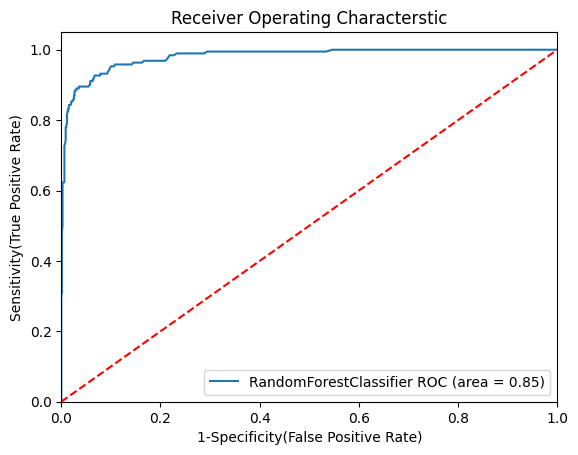

In [ ]:
# Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score, roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models=[
    {
        'label':'RandomForestClassifier',
        'model': RandomForestClassifier(n_estimators=500,min_samples_split=2,max_features=8,max_depth=None),
        'auc': 0.8456
    }
]
# Create loop through all model
for algo in auc_models:
    model = algo['model'] # Select the model
    model.fit(X_train,y_train) # Train the model

# Compute False positive rate , and True positive rate
    fpr,tpr,thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])

# Calculate Area under the curve to display on the plot
    plt.plot(fpr,tpr,label='%s ROC (area = %0.2f)'%(algo['label'],algo['auc']))

# Custom settings for the plot
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characterstic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show()

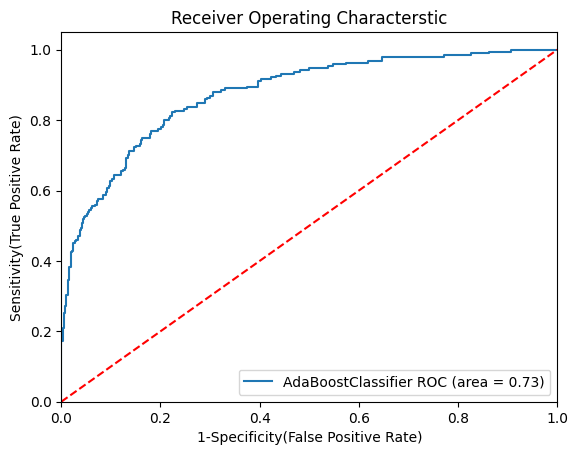

In [59]:
# Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score, roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models=[
    {
        'label':'AdaBoostClassifier',
        'model': AdaBoostClassifier(n_estimators=300,learning_rate=1,estimator=DecisionTreeClassifier(max_depth=3)),
        'auc': 0.7264
    }
]
# Create loop through all model
for algo in auc_models:
    model = algo['model'] # Select the model
    model.fit(X_train,y_train) # Train the model

# Compute False positive rate , and True positive rate
    fpr,tpr,thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])

# Calculate Area under the curve to display on the plot
    plt.plot(fpr,tpr,label='%s ROC (area = %0.2f)'%(algo['label'],algo['auc']))

# Custom settings for the plot
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characterstic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show()